## 분석요소도출

In [1]:
import pandas as pd

In [46]:
df_20TABLE_org = pd.read_excel('C:/STUDY/Web/6day_심평원_데이터분석/files_new/df_20TABLE_kor_명세서일반내역.xlsx')
df_20TABLE_org.head()

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665


In [3]:
df_20TABLE_org_cp = df_20TABLE_org.copy()

- 1. 결측치 모두 제거
- 2. 이상치 확인 후 있으면 제거
- 3. 전체 중복 데이터 확인 후 있으면 행단위 제거

In [4]:
# 1.
df_20TABLE_org_cp.dropna(axis=0)

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
19,20,318,3,0,3,12,0.03,33.332946,58,1,...,1,39320,15700,23620,0,$,$,$,$,11065
26,27,318,3,0,3,12,0.03,33.332946,57,1,...,1,10220,4000,6220,0,$,$,$,$,11065
137,138,254,3,3,2,16,0.03,33.332825,78,2,...,30,1814730,348870,1465860,0,V161,$,$,$,36128
158,159,4,3,0,3,6,0.03,33.333097,25,2,...,1,21270,10600,10670,0,$,$,$,$,25364
201,202,318,3,3,2,12,0.03,33.332946,58,1,...,26,2844920,650950,2193970,0,$,$,$,$,10951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,5247,254,3,3,2,16,0.03,33.332825,78,2,...,31,1933260,366300,1566960,0,V161,$,$,$,36128
5298,5299,254,3,3,2,16,0.03,33.332825,77,2,...,31,1834410,496610,1337800,0,$,$,$,$,36128
5332,5333,136,3,3,2,5,0.03,33.333119,23,1,...,27,1745800,483770,1262030,0,$,$,$,$,3441
5386,5387,152,3,0,3,6,0.03,33.333097,27,2,...,1,43010,21500,21510,0,$,$,$,$,31848


In [5]:
# 2.
df_20TABLE_org_cp.describe()

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,진료결과구분코드,진료과목코드,최초입원일자,요양일수,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,요양기관 고유번호
count,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5631.000000,5.631000e+03,5631.000000,5631.000000,5631.000000,...,5631.000000,5631.000000,6.400000e+01,5631.000000,5631.000000,5.631000e+03,5.631000e+03,5.631000e+03,5631.000000,5631.000000
mean,2816.000000,166.294974,2.995028,0.012254,3.220210,10.049725,3.000031e-02,33.332984,47.783520,1.491387,...,1.206713,10.157698,2.012841e+07,1.599183,1.136210,5.185643e+04,1.076908e+04,4.101253e+04,0.187001,24711.570591
std,1625.674014,94.674305,0.079810,0.191356,0.839197,4.786788,1.823953e-07,0.000203,23.707225,0.499970,...,1.144559,13.380986,4.339736e+03,3.915002,1.800657,3.590136e+05,6.282138e+04,3.138938e+05,1.283872,14722.537851
min,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000e-02,33.332569,2.000000,1.000000,...,1.000000,0.000000,2.012050e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.000000
25%,1408.500000,83.000000,3.000000,0.000000,3.000000,7.000000,3.000019e-02,33.332882,32.000000,1.000000,...,1.000000,1.000000,2.013012e+07,1.000000,1.000000,1.103500e+04,1.800000e+03,7.890000e+03,0.000000,11281.000000
50%,2816.000000,174.000000,3.000000,0.000000,3.000000,12.000000,3.000030e-02,33.333002,56.000000,1.000000,...,1.000000,5.000000,2.013061e+07,1.000000,1.000000,1.382000e+04,3.900000e+03,1.039000e+04,0.000000,24577.000000
75%,4223.500000,256.000000,3.000000,0.000000,3.000000,14.000000,3.000041e-02,33.333119,67.000000,2.000000,...,1.000000,13.000000,2.013101e+07,1.000000,1.000000,2.305500e+04,7.000000e+03,1.591500e+04,0.000000,37938.000000
max,5631.000000,320.000000,4.000000,3.000000,11.000000,16.000000,3.000069e-02,33.333333,94.000000,2.000000,...,9.000000,56.000000,2.013123e+07,66.000000,36.000000,1.413802e+07,3.461590e+06,1.338616e+07,9.000000,50866.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a7f27a97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7f27a9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7f27a9520>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7f2e66370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7f2e66640>],
 'means': []}

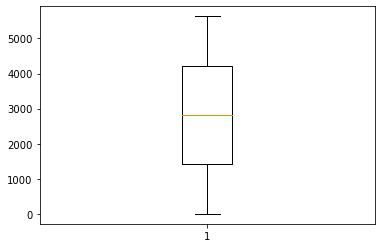

In [6]:
import matplotlib,pylab as plt
import matplotlib as mpl

plt.boxplot(df_20TABLE_org_cp['명세서 연결코드'])


In [7]:
# 3
df_20TABLE_org_cp[df_20TABLE_org_cp.duplicated()]

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호


### 월별/연령대별 본인부담비용 시각화분석

In [8]:
# 수진자연령, 요양개시일자. 심결본인부담금
df_month_age = df_20TABLE_org[['수진자연령','요양개시일자','심결본인부담금']]
df_month_age

,수진자연령,요양개시일자,심결본인부담금
0,62,20130108,2800
1,74,20130212,500
2,14,20130222,1300
3,68,20130608,7900
4,19,20131128,2800
...,...,...,...
5626,9,20131001,3900
5627,20,20130423,3500
5628,4,20130112,2900
5629,47,20130401,2800


#### 연령대 컬럼 만들기

In [9]:
# 연령대 조건 만들기
# 9세이하. 10대, 20대 ~90대, 100대 이상

df_9under = df_month_age[df_month_age['수진자연령'] <= 9]
df_9under = df_9under.reset_index(drop = True)
df_9under['연령대'] = '9세이하'
df_9under

,수진자연령,요양개시일자,심결본인부담금,연령대
0,3,20131211,2900,9세이하
1,6,20130129,2800,9세이하
2,3,20130130,2700,9세이하
3,6,20130130,6500,9세이하
4,6,20130502,2800,9세이하
...,...,...,...,...
664,5,20131207,2000,9세이하
665,6,20130201,2800,9세이하
666,3,20130622,2000,9세이하
667,9,20131001,3900,9세이하


In [10]:
df_10 = df_month_age[(df_month_age['수진자연령'] >= 10) & (df_month_age['수진자연령'] <= 19)]
df_10 = df_10.reset_index(drop = True)
df_10['연령대'] = '10대'
df_10.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,14,20130222,1300,10대
1,19,20131128,2800,10대
2,15,20130204,3900,10대
3,14,20130219,4800,10대
4,14,20130315,8300,10대


In [11]:
df_20 = df_month_age[(df_month_age['수진자연령'] >= 20) & (df_month_age['수진자연령'] <= 29)]
df_20 = df_20.reset_index(drop = True)
df_20['연령대'] = '20대'
df_20.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,20,20130516,4700,20대
1,29,20130308,3200,20대
2,20,20130315,4300,20대
3,20,20130426,3900,20대
4,26,20130319,4400,20대


In [12]:
df_30 = df_month_age[(df_month_age['수진자연령'] >= 30) & (df_month_age['수진자연령'] <= 39)]
df_30 = df_30.reset_index(drop = True)
df_30['연령대'] = '30대'
df_30.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,39,20130531,5400,30대
1,35,20130930,2800,30대
2,32,20130405,3300,30대
3,35,20130118,12400,30대
4,33,20130808,3300,30대


In [13]:
df_40 = df_month_age[(df_month_age['수진자연령'] >= 40) & (df_month_age['수진자연령'] <= 49)]
df_40 = df_40.reset_index(drop = True)
df_40['연령대'] = '40대'
df_40.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,46,20130629,8400,40대
1,40,20131228,4900,40대
2,45,20130105,15600,40대
3,44,20130504,18200,40대
4,42,20130916,5900,40대


In [14]:
df_50 = df_month_age[(df_month_age['수진자연령'] >= 50) & (df_month_age['수진자연령'] <= 59)]
df_50 = df_50.reset_index(drop = True)
df_50['연령대'] = '50대'
df_50.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,52,20131123,5600,50대
1,50,20131114,8900,50대
2,53,20130125,10300,50대
3,58,20131210,15700,50대
4,57,20131127,10100,50대


In [15]:
df_60 = df_month_age[(df_month_age['수진자연령'] >= 60) & (df_month_age['수진자연령'] <= 69)]
df_60 = df_60.reset_index(drop = True)
df_60['연령대'] = '60대'
df_60.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,62,20130108,2800,60대
1,68,20130608,7900,60대
2,61,20130528,2800,60대
3,61,20130628,4300,60대
4,69,20131120,14300,60대


In [16]:
df_70 = df_month_age[(df_month_age['수진자연령'] >= 70) & (df_month_age['수진자연령'] <= 79)]
df_70 = df_70.reset_index(drop = True)
df_70['연령대'] = '70대'
df_70.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,74,20130212,500,70대
1,76,20130107,1500,70대
2,75,20130130,1500,70대
3,71,20130515,1500,70대
4,77,20130516,9400,70대


In [17]:
df_80 = df_month_age[(df_month_age['수진자연령'] >= 80) & (df_month_age['수진자연령'] <= 89)]
df_80 = df_80.reset_index(drop = True)
df_80['연령대'] = '80대'
df_80.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,81,20130315,8000,80대
1,81,20131007,1500,80대
2,81,20130701,1500,80대
3,83,20130506,500,80대
4,81,20131002,1500,80대


In [18]:
df_90 = df_month_age[(df_month_age['수진자연령'] >= 90) & (df_month_age['수진자연령'] <= 99)]
df_90 = df_90.reset_index(drop = True)
df_90['연령대'] = '90대'
df_90.head()

,수진자연령,요양개시일자,심결본인부담금,연령대
0,94,20130827,8500,90대
1,94,20130916,1500,90대
2,93,20130105,1500,90대
3,93,20130117,5900,90대
4,94,20130624,1500,90대


In [19]:
# 모든 연령대를 1개의 데이터프레임으로 통합
df_month_age_any = pd.DataFrame()

df_month_age_any = pd.concat([df_month_age_any, df_9under], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_10], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_20], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_30], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_40], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_50], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_60], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_70], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_80], ignore_index=True)
df_month_age_any = pd.concat([df_month_age_any, df_90], ignore_index=True)
df_month_age_any

,수진자연령,요양개시일자,심결본인부담금,연령대
0,3,20131211,2900,9세이하
1,6,20130129,2800,9세이하
2,3,20130130,2700,9세이하
3,6,20130130,6500,9세이하
4,6,20130502,2800,9세이하
...,...,...,...,...
5626,94,20130423,1500,90대
5627,94,20130709,1500,90대
5628,94,20131208,1500,90대
5629,94,20130401,1500,90대


In [20]:
# 월 추출하기 위해서 정수형을 문자형으로 변환
df_month_age_any['요양개시일자'] = df_month_age_any['요양개시일자'].astype(str)
df_month_age_any.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   수진자연령    5631 non-null   int64 
 1   요양개시일자   5631 non-null   object
 2   심결본인부담금  5631 non-null   int64 
 3   연령대      5631 non-null   object
dtypes: int64(2), object(2)
memory usage: 176.1+ KB


In [21]:
df_month_age_any['요양개시월'] = df_month_age_any['요양개시일자'].str[4:6]
df_month_age_any.head()

,수진자연령,요양개시일자,심결본인부담금,연령대,요양개시월
0,3,20131211,2900,9세이하,12
1,6,20130129,2800,9세이하,01
2,3,20130130,2700,9세이하,01
3,6,20130130,6500,9세이하,01
4,6,20130502,2800,9세이하,05


In [22]:
df_month_age_any.to_excel('C:/STUDY/Web/6day_심평원_데이터분석/files_new2/df_month_age_any.xlsx',index=False)

In [61]:
import numpy as np

In [82]:
df_age = df_month_age.copy()

In [65]:
def f(age):
    for age in df_age['수진자연령']:
        if (age <= 9) :
            print('9세이하')
        elif (age >=10 and age <=19):
            print('10대')
        elif (age >=20 and age <=29):
            print('20대')
        elif (age >=30 and age <=39):
            print('30대')
        elif (age >=40 and age <=49):
            print('40대')
        elif (age >=50 and age <=59):
            print('50대')
        elif (age >=60 and age <=69):
            print('60대')
        elif (age >=70 and age <=79):
            print('70대')
        elif (age >=80 and age <=89):
            print('80대')
        elif (age >=90 and age <=99):
            print('90대')
    return 



In [101]:
condition = [(df_age['수진자연령'] <=9),
             (df_age['수진자연령'] <=19) & (df_age['수진자연령'] >=10),
             (df_age['수진자연령'] <=29) & (df_age['수진자연령'] >=20),
             (df_age['수진자연령'] <=39) & (df_age['수진자연령'] >=30),
             (df_age['수진자연령'] <=49) & (df_age['수진자연령'] >=40),
             (df_age['수진자연령'] <=59) & (df_age['수진자연령'] >=50),
             (df_age['수진자연령'] <=69) & (df_age['수진자연령'] >=60),
             (df_age['수진자연령'] <=79) & (df_age['수진자연령'] >=70),
             (df_age['수진자연령'] <=89) & (df_age['수진자연령'] >=80),
             (df_age['수진자연령'] <=99) & (df_age['수진자연령'] >=90)]

age = ['9세이하','10대','20대','30대','40대','50대','60대','70대','80대','90대']

df_age['연령대'] = np.select(condition, age)
df_age

,수진자연령,요양개시일자,심결본인부담금,연령대
0,62,20130108,2800,60대
1,74,20130212,500,70대
2,14,20130222,1300,10대
3,68,20130608,7900,60대
4,19,20131128,2800,10대
...,...,...,...,...
5626,9,20131001,3900,9세이하
5627,20,20130423,3500,20대
5628,4,20130112,2900,9세이하
5629,47,20130401,2800,40대


In [68]:
def f(age):
    for age in df_age['수진자연령']:
        if (age <= 9) :
            val = '9세이하'
        elif (age >=10 and age <=19):
            val = '10대'
        elif (age >=20 and age <=29):
            val = '20대'
        elif (age >=30 and age <=39):
            val = '30대'
        elif (age >=40 and age <=49):
            val = '40대'
        elif (age >=50 and age <=59):
            val = '50대'
        elif (age >=60 and age <=69):
            val = '60대'
        elif (age >=70 and age <=79):
            val = '70대'
        elif (age >=80 and age <=89):
            val = '80대'
        elif (age >=90 and age <=99):
            val = '90대'
    return 

df_age['연령대'] = df_age.apply(f, axis=1)

In [69]:
df_age

,수진자연령,요양개시일자,심결본인부담금,연령대,연령데
0,62,20130108,2800,None,None
1,74,20130212,500,None,None
2,14,20130222,1300,None,None
3,68,20130608,7900,None,None
4,19,20131128,2800,None,None
...,...,...,...,...,...
5626,9,20131001,3900,None,None
5627,20,20130423,3500,None,None
5628,4,20130112,2900,None,None
5629,47,20130401,2800,None,None


In [96]:
df_age['연령대'] = ["9세이하" if i <= 9   else '10대이상' for i in df_age['수진자연령']]

In [84]:
df_age

,수진자연령,요양개시일자,심결본인부담금,연령대
0,62,20130108,2800,9세이상
1,74,20130212,500,9세이상
2,14,20130222,1300,9세이상
3,68,20130608,7900,9세이상
4,19,20131128,2800,9세이상
...,...,...,...,...
5626,9,20131001,3900,9세이하
5627,20,20130423,3500,9세이상
5628,4,20130112,2900,9세이하
5629,47,20130401,2800,9세이상
